# TP Regression linéaire avec les nébuleuses galactiques

## Classe WranglingData

In [1]:
import pandas as pd
import math as mt

class WranglingData:

    def __init__(self,nomFichier):
        self.rawData = pd.read_csv(nomFichier)
        self.columns = []    
        self.DefineListColumns()
    
    def DefineListColumns(self):
        for column in self.rawData.iteritems():
            self.columns.append(column[0])

    def GetListColumns(self):
        return self.columns

    def SendCleanData(self):
        return self.rawData

    def GiveStatisticsSummary(self):

        for column in self.GetListColumns():
            
            print ('Variable : ',column)
            print('Effectif de la colonne {} : {}'.format(column,self.rawData[column].count()))
            print('Moyenne de la colonne {} : {}'.format(column,self.rawData[column].mean()))
            print('Médiane de la colonne {} : {}'.format(column,self.rawData[column].median()))
            print('Ecart type de la colonne {} : {}'.format(column,self.rawData[column].std()))            
            print('Minimum de la colonne {} : {}'.format(column,self.rawData[column].min()))
            print('Maximum de la colonne {} : {}'.format(column,self.rawData[column].max()))
            print('Coefficient de variation de la colonne {} : {}'.format(column,(self.rawData[column].std())/(self.rawData[column].mean())))
            print('-------------------------')
    
    def GetMissingData(self):
        for column in self.GetListColumns():

            print ('Variable : ',column)
            print('Nombre de valeurs manquantes pour la variable {} : {}'.format(column,self.rawData[column].isnull().sum()))
            print('-------------------------')

    def RemoveMissingData(self):        
        for column in self.GetListColumns():
            newData = self.rawData[self.rawData[column].notnull()]
        
        return newData
        

## Classe regression lineaire

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#from DataWrangling import WranglingData

class regressionLineaire:

    def __init__(self,cleanData,Ratio):
        self.data = cleanData
        self.ratio = Ratio

    def apercuDonnees(self):
        print(self.data.head())

    def renvoyerNombreMesures(self):
        return self.data.shape[0]

    def CreationEchantillon(self):        
        taille_echantillon_training = int(self.renvoyerNombreMesures() * (1-self.ratio))
        
        self.Training_Variable_Explicative = self.data.loc[:taille_echantillon_training,"distance"].to_frame()
        self.Training_Variable_Expliquee = self.data.loc[:taille_echantillon_training,"recession_velocity"].to_frame()
        
        self.Test_Variable_Explicative = self.data.loc[:taille_echantillon_training,"distance"].to_frame()
        self.Test_Variable_Expliquee = self.data.loc[:taille_echantillon_training:,"recession_velocity"].to_frame()     
        
    def CalculRegressionLineaire(self):
        self.regr = linear_model.LinearRegression()
        self.regr.fit(self.Training_Variable_Explicative,self.Training_Variable_Expliquee)
        self.Predictions = self.regr.predict(self.Test_Variable_Explicative)
        self.Coefficient = pd.DataFrame([[self.regr.intercept_[0],self.regr.coef_[0][0]]],columns=['Intersection','Coefficient'])

    def AfficherResultatsRegression(self):
        print('Les coefficients de la régression sont de la forme Vitesse = {} x Distance + {}'.format(self.Coefficient.Coefficient.values[0],self.Coefficient.Intersection.values[0]))
        print('Erreur carrée moyenne : {}'.format(mean_squared_error(self.Predictions,self.Test_Variable_Expliquee)))
        print('Variance expliquée : %.2f' % r2_score(self.Predictions,self.Test_Variable_Expliquee))
        print('Coefficient de détermination : ',self.regr.score(self.Predictions,self.Test_Variable_Expliquee))

    def AfficherDetailPredictions(self):
        delta = self.Test_Variable_Expliquee - self.Predictions
        delta.index = range(0,self.renvoyerNombreMesures() - self.ratio)
        self.Test_Variable_Expliquee.index = range(0,self.renvoyerNombreMesures() - self.ratio)
        
        self.predictionsDetail = pd.concat([self.Test_Variable_Expliquee,pd.DataFrame(self.Predictions),delta],axis=1,ignore_index=True)
        self.predictionsDetail.columns=['Valeurs','Prédictions','Delta']
        print(self.predictionsDetail)

    def RenvoyerVecteurExplicatifTraining(self):
        return self.Training_Variable_Explicative

    def RenvoyerVecteurExpliqueTraining(self):
        return self.Training_Variable_Expliquee

    def RenvoyerVecteurExplicatifTest(self):
        return self.Test_Variable_Explicative

    def RenvoyerVecteurExpliqueTest(self):
        return self.Test_Variable_Expliquee

    def RenvoyerVecteurPredictions(self):
        return self.Predictions

    def RenvoyerCoefficientsRegression(self):
        return self.Coefficient

    def RenvoyerDetailRegression(self):
        return self.predictionsDetail

    def RenvoyerResultatsRegression(self):
        results=[]        
        results.append(self.regr.intercept_[0])
        results.append(self.regr.coef_[0][0])
        results.append(mean_squared_error(self.Predictions,self.Test_Variable_Expliquee))
        results.append(r2_score(self.Predictions,self.Test_Variable_Expliquee))
        results.append(self.regr.score(self.Predictions,self.Test_Variable_Expliquee))
        
        Libelle = ['Intersection','Coefficient','Erreur_carree_moyenne','Variance_expliquee','Coefficient_determination']
        
        self.Resultats = pd.DataFrame([results],columns=Libelle)
        
        return self.Resultats



## Classe visualisation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from DataWrangling import WranglingData
#from RegressionLineaire import regressionLineaire

class visualisation:

    def __init__(self):
        pass    
    
    def Afficher_Courbe_Simple(self,typeGraph,abscisse,ordonnee):
        plt.style.use('seaborn-whitegrid')
        plan = plt.figure()
        axes = plt.axes()
        
        if(typeGraph=='courbe'):
            axes.plot(abscisse,ordonnee)
        
        if(typeGraph=='point'):
            axes.scatter(abscisse,ordonnee,s=10,c='red',marker='o',edgecolor='none')
        
        if(typeGraph=='errorpoint'):
            etendueErreur=float(150)
            plt.errorbar(abscisse, ordonnee, yerr=etendueErreur, fmt='.k')            
        
        if(typeGraph=='errorpointbrut'):
            etendueErreur=float(150)            
            plt.errorbar(abscisse, ordonnee, yerr=etendueErreur, fmt='o', 
                         color='black', ecolor='lightgray', elinewidth=3, capsize=0)
        
        # Définition des légendes
        plt.title("Relation entre vélocité et distance des nébuleuses galactiques")
        plt.legend(loc='lower left')
        axes = axes.set(xlabel='Distance en Km par sec', ylabel='Vélocité en Km par sec')        
        
    def Afficher_Distribution(self,data,classes,classesLabels,titre,couleur):
        plt.style.use('seaborn-whitegrid')
        plan = plt.figure()
        axes = plt.axes()
        
        # Définition des légendes
        plt.title(titre)
        plt.xticks(classes, classesLabels, rotation=30)
        plt.hist(data, edgecolor='#E6E6E6', color=couleur)

    def Afficher_Distribution_Normale(self,dataExpl):
        sns.set()
        sns.distplot(dataExpl, kde=True)    

    def Afficher_Courbe_Regression(self,abscisse,ordonnee,prediction):
        plt.style.use('seaborn-whitegrid')
        plan = plt.figure()
        axes = plt.axes()
        
        axes.plot(abscisse,prediction)
        axes.scatter(abscisse,ordonnee,s=10,c='red',marker='o',edgecolor='none')
        
        # Définition des légendes
        plt.title("Courbe de régression vélocité / distance nébuleuses galactiques")
        plt.legend(loc='lower left');
        axes = axes.set(xlabel='Distance en Km par sec', ylabel='Vélocité en Km par sec')
        
    def Afficher_Detail_Regression(self,detail):
        for column in detail:
            print('{} a pour valeur : {}'.format(column,detail[column][0]))
        
    def Afficher_Representation_Appariee(self,rawData):
        sns.set()
        sns.pairplot(rawData, size=2.5)

    def Afficher_Courbe_Regression_Lineaire(self,rawData):
        with sns.axes_style('white'):
            sns.jointplot("distance", "recession_velocity", data=rawData, kind='reg')


## Data wrangling

In [6]:
# Constitution de la base de données
d = WranglingData("E:/Data/RawData/hubble_data.csv")

In [7]:
# Vérification que chaque ligne de donnée ne comporte pas d'élément manquant
d.GetMissingData()

Variable :  distance
Nombre de valeurs manquantes pour la variable distance : 0
-------------------------
Variable :  recession_velocity
Nombre de valeurs manquantes pour la variable recession_velocity : 0
-------------------------


In [8]:
# Suppression des potentielles lignes aux données incomplètes
d.RemoveMissingData()

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [9]:
# Production de quelques statistiques descriptives afin d'avoir un aperçu des données
d.GiveStatisticsSummary()

Variable :  distance
Effectif de la colonne distance : 24
Moyenne de la colonne distance : 0.9113749999999999
Médiane de la colonne distance : 0.9
Ecart type de la colonne distance : 0.6454957523519018
Minimum de la colonne distance : 0.032
Maximum de la colonne distance : 2.0
Coefficient de variation de la colonne distance : 0.70826580974012
-------------------------
Variable :  recession_velocity
Effectif de la colonne recession_velocity : 24
Moyenne de la colonne recession_velocity : 373.125
Médiane de la colonne recession_velocity : 295.0
Ecart type de la colonne recession_velocity : 371.25466619816785
Minimum de la colonne recession_velocity : -220
Maximum de la colonne recession_velocity : 1090
Coefficient de variation de la colonne recession_velocity : 0.9949873800955923
-------------------------


## Data computing

In [10]:
# Calcul de la régression linéaire
reg = regressionLineaire(d.SendCleanData(),0)
reg.CreationEchantillon()
reg.CalculRegressionLineaire()

In [11]:
# Affichage des résultats de base
reg.AfficherResultatsRegression()


Les coefficients de la régression sont de la forme Vitesse = 454.1584409226285 x Distance + -40.78364909586048
Erreur carrée moyenne : 49726.76526133917
Variance expliquée : 0.40
Coefficient de détermination :  -344383.995389295


In [12]:
# Affichage des prédictions
reg.AfficherDetailPredictions()

    Valeurs  Prédictions       Delta
0       170   -26.250579  196.250579
1       290   -25.342262  315.342262
2      -130    56.406257 -186.406257
3       -70    78.660021 -148.660021
4      -185    84.109922 -269.109922
5      -220    84.109922 -304.109922
6       200   163.587649   36.412351
7       290   186.295571  103.704429
8       270   186.295571   83.704429
9       200   245.336169  -45.336169
10      300   322.543104  -22.543104
11      -30   367.958948 -397.958948
12      650   367.958948  282.041052
13      150   367.958948 -217.958948
14      500   367.958948  132.041052
15      920   413.374792  506.625208
16      450   458.790636   -8.790636
17      500   458.790636   41.209364
18      500   595.038168  -95.038168
19      960   731.285700  228.714300
20      500   867.533233 -367.533233
21      850   867.533233  -17.533233
22      800   867.533233  -67.533233
23     1090   867.533233  222.466767


## Data visualisation

In [13]:
# Visualisation des données
v = visualisation()

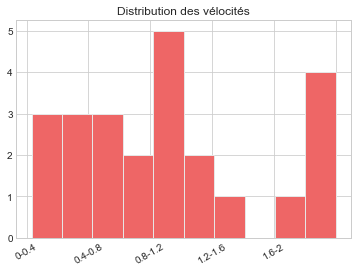

In [14]:
v.Afficher_Distribution(reg.RenvoyerVecteurExplicatifTraining().values,
                        np.linspace(0,2,6),
                        ['0-0.4', '0.4-0.8', '0.8-1.2', '1.2-1.6', '1.6-2'],
                        "Distribution des vélocités",
                        '#EE6666')

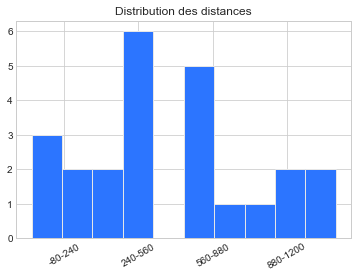

In [15]:
v.Afficher_Distribution(reg.RenvoyerVecteurExpliqueTraining().values,
                        np.linspace(-400,1200,6),
                        ['-400-80', '-80-240', '240-560', '560-880', '880-1200'],
                        "Distribution des distances",
                        '#2C75FF')

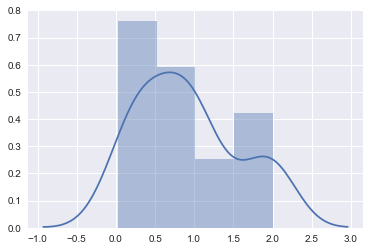

In [16]:
v.Afficher_Distribution_Normale(reg.RenvoyerVecteurExplicatifTraining().values)

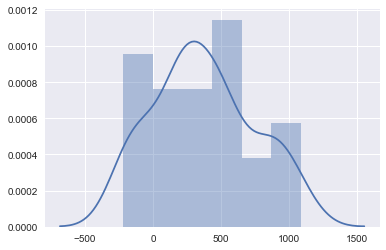

In [17]:
v.Afficher_Distribution_Normale(reg.RenvoyerVecteurExpliqueTraining().values)

No handles with labels found to put in legend.


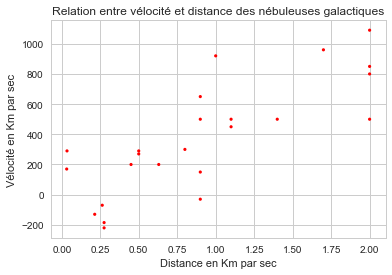

In [18]:
v.Afficher_Courbe_Simple('point',
                         reg.RenvoyerVecteurExplicatifTraining().values,
                         reg.RenvoyerVecteurExpliqueTraining().values)

No handles with labels found to put in legend.


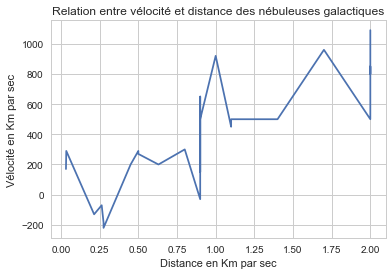

In [19]:
v.Afficher_Courbe_Simple('courbe',
                         reg.RenvoyerVecteurExplicatifTraining().values,
                         reg.RenvoyerVecteurExpliqueTraining().values)

No handles with labels found to put in legend.


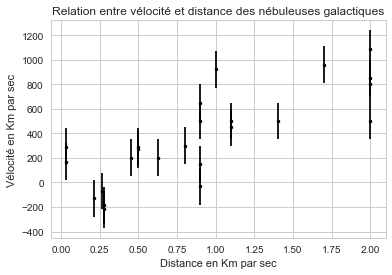

In [20]:
v.Afficher_Courbe_Simple('errorpoint',
                         reg.RenvoyerVecteurExplicatifTraining().values,
                         reg.RenvoyerVecteurExpliqueTraining().values)

No handles with labels found to put in legend.


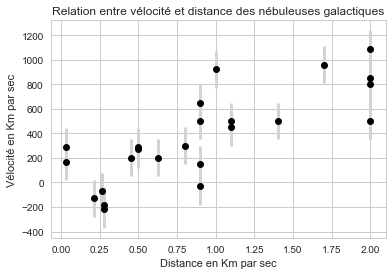

In [21]:
v.Afficher_Courbe_Simple('errorpointbrut',
                         reg.RenvoyerVecteurExplicatifTraining().values,
                         reg.RenvoyerVecteurExpliqueTraining().values)

In [22]:
reg.AfficherResultatsRegression()

Les coefficients de la régression sont de la forme Vitesse = 454.1584409226285 x Distance + -40.78364909586048
Erreur carrée moyenne : 49726.76526133917
Variance expliquée : 0.40
Coefficient de détermination :  -344383.995389295


No handles with labels found to put in legend.


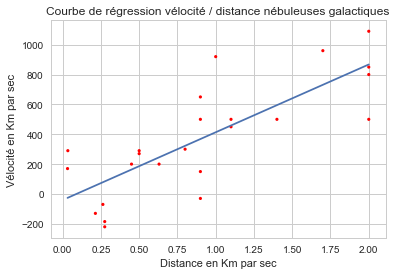

In [23]:
v.Afficher_Courbe_Regression(reg.RenvoyerVecteurExplicatifTest().values,
                             reg.RenvoyerVecteurExpliqueTest().values,
                             reg.RenvoyerVecteurPredictions())

In [24]:
v.Afficher_Detail_Regression(reg.RenvoyerResultatsRegression())

Intersection a pour valeur : -40.78364909586048
Coefficient a pour valeur : 454.1584409226285
Erreur_carree_moyenne a pour valeur : 49726.76526133917
Variance_expliquee a pour valeur : 0.39622926790211
Coefficient_determination a pour valeur : -344383.995389295


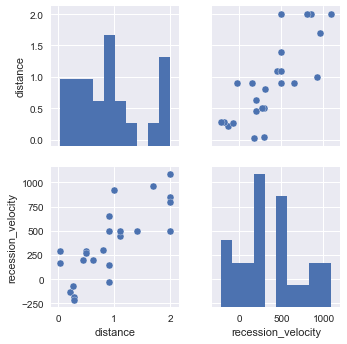

In [25]:
v.Afficher_Representation_Appariee(d.SendCleanData())

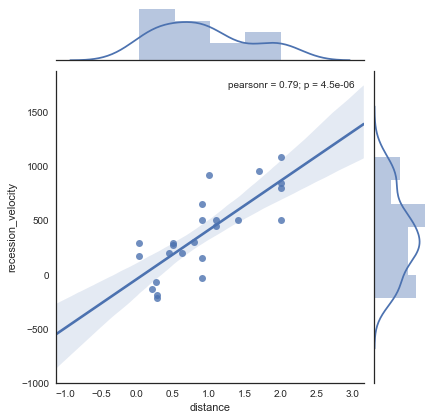

In [26]:
v.Afficher_Courbe_Regression_Lineaire(d.SendCleanData())

### On constate que seules 9 observations sur 24 sont dans l'intervalle de confiance de la droite de régression
### Ce ratio de 37,5 % reflète la relative pertinence de cette droite de régression
### S'il n'y a aucun doute sur l'existence d'une corrélation entre distance et vélocité des nébuleuses galactiques
### La nature de la corrélation n'est sans doute pas strictement linéaire et le modèle plus complexe...